# Import all the required libraries 
inline statement - displays the graphs in the curent notebook

In [266]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split

# Read the train.csv file into DataFrame house_prices

In [220]:
house_prices = pd.read_csv("E:\Data Science\Capstone Project - House prices\Datasets\\train.csv")

In [221]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


h_p is the copy of DataFrame h_p

In [222]:
h_p = house_prices.copy()

In [223]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Calculate columns having null values of more than 20% of the total data (records in each column)

In [224]:
h_p.columns[h_p.isnull().sum() > ((len(h_p)* 20)/100)].tolist()


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

# I have decided to drop the columns 'Alley', 'FireplaceQu', 'PoolQC' , 'Fence', 'MiscFeature' - as they are too many null values in each of these columns.  

In [225]:
# Used get_loc() method to obtain the locations of each column (6,57,72,73,74)
h_p.drop(h_p.columns[[6,57,72,73,74]], axis=1, inplace=True)

In [226]:
h_p.shape

(1460, 76)

In [227]:
# Displays the data types and non-null values of h_p
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [228]:
h_p.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# DATA MUNGING & DATA CLEANING

Some of the columns in the h_p dataframe contain null values. I used "padding method" to fill the missing data. 

Also I have replaced the column values - 'NA - No Basement' with 'NoBsmnt' and 'NA - No Garage' with 'NoGrg' - I did this for my convinience, it is absolutely not mandatory

In [229]:
h_p['MasVnrType'].fillna(method='pad', inplace= True)

In [230]:
h_p['BsmtQual'].replace('NA', 'NoBsmnt', inplace=True)

In [231]:
h_p['BsmtQual'].fillna(method='pad', inplace=True)

In [232]:
h_p['BsmtCond'].replace('NA', 'NoBsmnt', inplace=True)

In [233]:
h_p['BsmtCond'].fillna(method='pad', inplace=True)

In [234]:
h_p['BsmtExposure'].replace('NA', 'NoBsmnt', inplace=True)

In [235]:
h_p['BsmtExposure'].fillna(method='pad', inplace=True)

In [236]:
h_p['BsmtFinType1'].replace('NA', 'NoBsmnt', inplace=True)

In [237]:
h_p['BsmtFinType1'].fillna(method='pad', inplace=True)

In [238]:
h_p['BsmtFinType2'].replace('NA', 'NoBsmnt', inplace=True)

In [239]:
h_p['BsmtFinType2'].fillna(method='pad', inplace=True)

In [240]:
h_p['GarageType'].replace('NA', 'NoGrg', inplace=True)

In [241]:
h_p['GarageType'].fillna(method='pad', inplace=True)

In [242]:
h_p['GarageFinish'].replace('NA', 'NoGrg', inplace=True)

In [243]:
h_p['GarageFinish'].fillna(method='pad', inplace=True)

In [244]:
h_p['GarageCond'].replace('NA', 'NoGrg', inplace=True)

In [245]:
h_p['GarageCond'].fillna(method='pad', inplace=True)

In [246]:
h_p['GarageQual'].replace('NA', 'NoGrg', inplace=True)

In [247]:
h_p['GarageQual'].fillna(method='pad', inplace=True)

In [248]:
h_p['Electrical'].fillna(method='pad', inplace=True)

Checking if the Dataframe has any null values

In [249]:
h_p.isnull().values.any()

True

In [250]:
h_p.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond   

LotFrontage, GarageYrBlt, MasVnrArea - numerical variables have null values. I used interpolate method to fill the missing values

In [251]:
h_p['LotFrontage'].interpolate(method='linear', axis=0, inplace=True)

In [252]:
h_p['GarageYrBlt'].interpolate(method='linear', axis=0, inplace=True)

In [253]:
h_p['MasVnrArea'].interpolate(method='linear', axis=0, inplace=True)

DataFrame is clean without any missing values

In [254]:
h_p.isnull().values.any()

False

I picked four columns that might effect the final sale price of the house (based on real estate market knowledge)


In [255]:
hpdf = h_p[['Neighborhood', 'OverallQual', 'YearBuilt', 'BsmtCond']]

In [291]:
np.sort(hpdf['Neighborhood'].unique())

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [292]:
np.sort(hpdf['BsmtCond'].unique())

array(['Fa', 'Gd', 'Po', 'TA'], dtype=object)

# Creating dummy variables for the categorical variables - 'Neighborhood', 'BsmtCond'

In [293]:
hpdf_dummies = pd.get_dummies(hpdf, columns=['Neighborhood', 'BsmtCond'])

# Added a column 'Age' to know how old the house is and dropped the column 'YearBuilt'

In [295]:
hpdf_dummies.drop(['YearBuilt'], axis=1, inplace=True)

In [296]:
hpdf_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
OverallQual             1460 non-null int64
Neighborhood_Blmngtn    1460 non-null uint8
Neighborhood_Blueste    1460 non-null uint8
Neighborhood_BrDale     1460 non-null uint8
Neighborhood_BrkSide    1460 non-null uint8
Neighborhood_ClearCr    1460 non-null uint8
Neighborhood_CollgCr    1460 non-null uint8
Neighborhood_Crawfor    1460 non-null uint8
Neighborhood_Edwards    1460 non-null uint8
Neighborhood_Gilbert    1460 non-null uint8
Neighborhood_IDOTRR     1460 non-null uint8
Neighborhood_MeadowV    1460 non-null uint8
Neighborhood_Mitchel    1460 non-null uint8
Neighborhood_NAmes      1460 non-null uint8
Neighborhood_NPkVill    1460 non-null uint8
Neighborhood_NWAmes     1460 non-null uint8
Neighborhood_NoRidge    1460 non-null uint8
Neighborhood_NridgHt    1460 non-null uint8
Neighborhood_OldTown    1460 non-null uint8
Neighborhood_SWISU      1460 non-null uint8
Neighborhood_

In [297]:
hpdf_dummies.columns.get_loc('BsmtCond_Gd')

27

In [298]:
output_df = h_p['SalePrice']

# Split the dataframe into training set and test set

In [300]:
hpdf_dummies_train, hpdf_dummies_test, output_df_train, output_df_test = train_test_split(hpdf_dummies, output_df, 
                                                                          test_size=0.2, random_state=0)

Examine the test and train sets

In [301]:
hpdf_dummies_train.shape

(1168, 30)

In [303]:
hpdf_dummies_test.shape

(292, 30)

In [304]:
output_df_train.shape

(1168,)

In [305]:
output_df_test.shape

(292,)

In [208]:
hpdf_dummies_neighborhood = hpdf_dummies.copy()

In [209]:
hpdf_dummies_neighborhood.drop(hpdf_dummies_neighborhood.columns[[0,26,27,28,29,30]],axis=1, inplace=True)

In [210]:
hpdf_dummies_neighborhood.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Create a dataframe with the output variable 'SalePrice'

The variables 'Neighborhood' and 'BsmtCond' are categorical variables. Hence they have to be converted to numeric since the machine learning algorithm only takes numeric inputs.

This can be achieved by Label Encoding supported by Python's Machine Learning library scikit.

In [174]:
labelencoder_hpdf = LabelEncoder()
hpdf.values[:, 0] = labelencoder_hpdf.fit_transform(hpdf.values[:, 0])

In [175]:
hpdf

,Neighborhood,OverallQual,YearBuilt,BsmtCond
0,CollgCr,7,2003,TA
1,Veenker,6,1976,TA
2,CollgCr,7,2001,TA
3,Crawfor,7,1915,Gd
4,NoRidge,8,2000,TA
5,Mitchel,5,1993,TA
6,Somerst,8,2004,TA
7,NWAmes,7,1973,TA
8,OldTown,7,1931,TA
9,BrkSide,5,1939,TA


# Divided the dataframe into two - numerical and categorical

Numerical variables - h_p_numerical

In [92]:
h_p_numerical = h_p.select_dtypes(include = [np.number])

Pearson correlation on resultant variable 'Sale Price'

In [93]:
h_p_numerical_corr = h_p_numerical.corr(method='pearson')['SalePrice']

In [94]:
h_p_numerical_corr[np.argsort(h_p_numerical_corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474279
GarageYrBlt      0.467290
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.310673
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

(5) major variables that are strongly correlated with the 'Sale Price'

In [95]:
h_p_numerical_corr.sort_values(ascending = False).head(6)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [36]:
h_p_numerical_topfive = h_p_numerical[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]

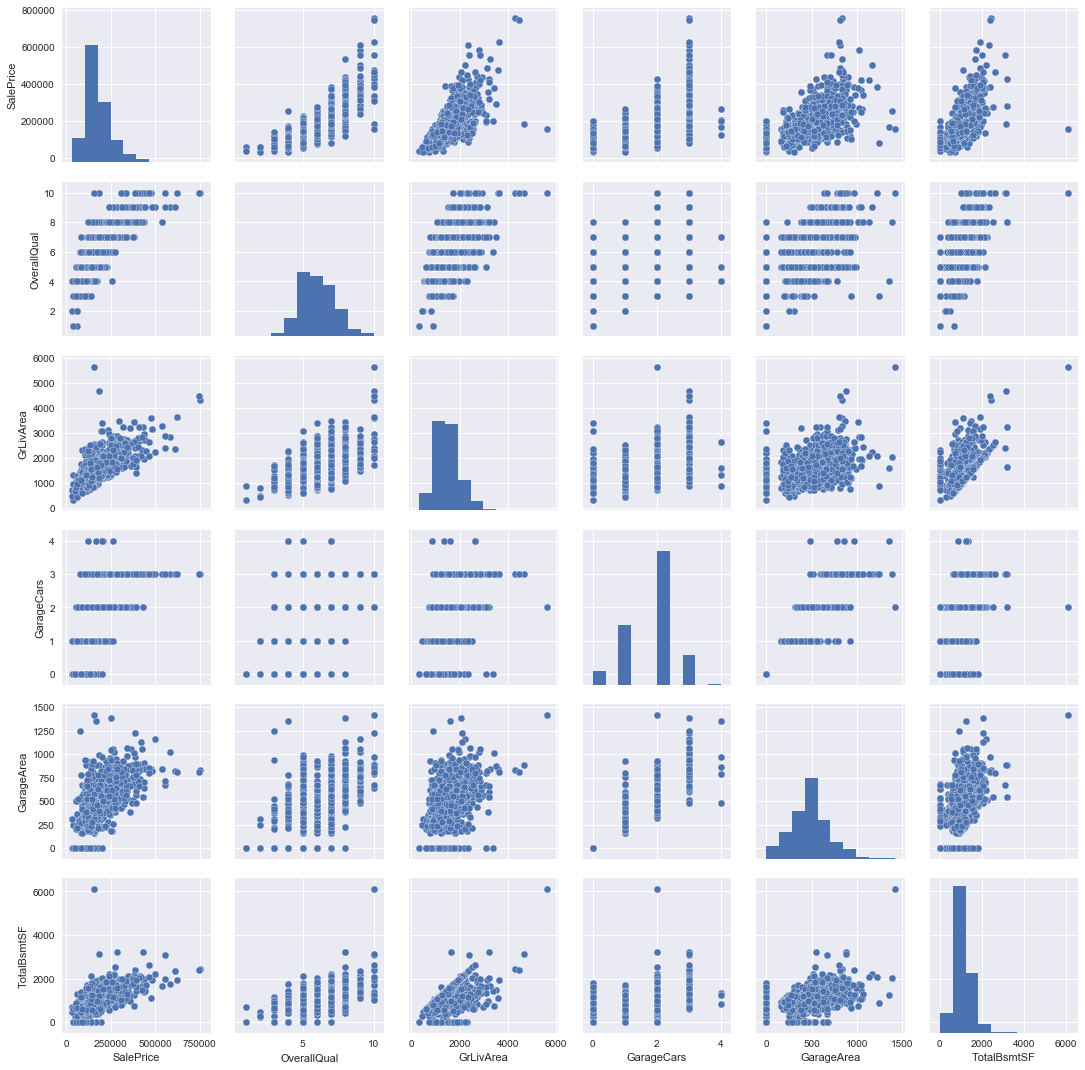

In [37]:
sns.pairplot(h_p_numerical_topfive)

AttributeError: 'builtin_function_or_method' object has no attribute 'startswith'

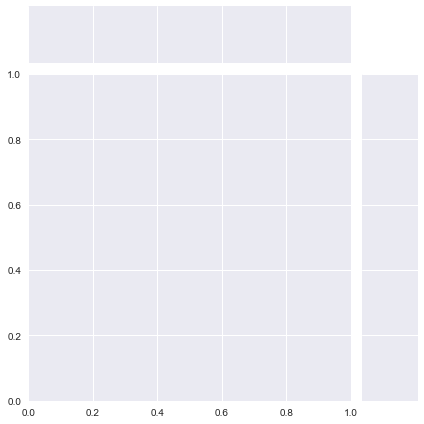

In [39]:
sns.jointplot(x='OverallQual', y='SalePrice', kind=hex)

# From the graph - most of the houses are 'Average', 'Above Average', 'Good'

In [ ]:
sns.set_style("white")
sns.set_style('ticks')
#sns.despine()
sns.distplot(h_p_numerical['OverallQual'], kde=False, rug=False, color='green', axlabel='Quality of the House')

# Average = 397
#  Above Average = 374
# Good = 319

In [ ]:
h_p_numerical.groupby('OverallQual').count()

In [ ]:
sns.set_style('white')
sns.set_style('ticks')
sns.boxplot(x='GrLivArea', data=h_p_numerical)

In [ ]:
h_p_numerical['GrLivArea'].quantile([0.25, 0.5, 0.75, 1])

In [ ]:
iqr = np.subtract(*np.percentile(h_p_numerical['GrLivArea'], [75, 25]))

In [ ]:
ol1 = h_p_numerical['GrLivArea'].quantile(0.25)-1.5*iqr
ol1

In [ ]:
ol2 = h_p_numerical['GrLivArea'].quantile(0.75)+1.5*iqr

In [ ]:
ol2

In [ ]:
ol = []
ol = (h_p_numerical['GrLivArea']<ol1) #or (h_p['GrLivArea']>ol2)

In [ ]:
ol.values()

In [ ]:
sns.boxplot(x='GarageCars', y ='GarageArea', data=h_p_numerical)

In [ ]:
#----------------------------------------------------------------------------------------------

Categorical variables - h_p_categorical

In [96]:
h_p_categorical = h_p.select_dtypes(include = [object])

In [97]:
h_p_categorical = h_p_categorical.apply(lambda x: x.astype('category'))

In [98]:
h_p_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null category
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
ExterCond        1460 non-null category
Foundation       1460 non-null category
BsmtQual         1460 non-null category
BsmtCond         1460 non-null category
BsmtExposure 

In [99]:
h_p_categorical.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1335,735,1360,914,638,1385,1404,1340,1267,1198


# RL - Residential Low Density
# RM - Residential Medium Density
# C - Commercial
# FV - Floating Village Residential
# RH - Residential High Density    


# Most of the houses are in 'Residential low density' zone. 


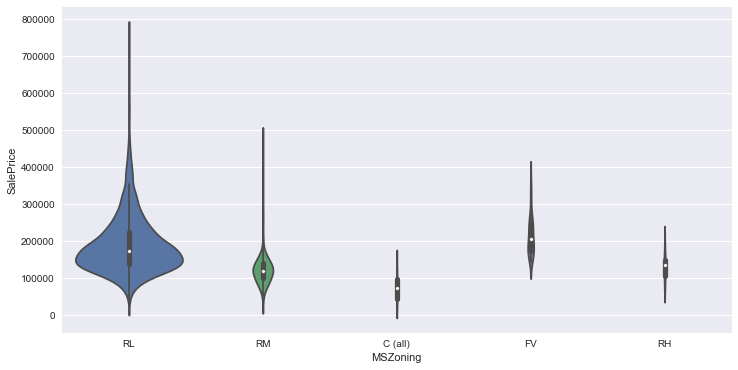

In [40]:
plt.figure(figsize = (12, 6))
sns.violinplot(x='MSZoning', y='SalePrice', data=h_p, scale='count')

In [ ]:
sns.countplot(x='MSZoning', data=h_p)

In [ ]:
# Pave - Street type, Grvl can be completely ignored
sns.countplot(x='Street', data=h_p)

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x='LotShape', y='SalePrice', data=h_p, scale='count')

In [ ]:
# AllPub - Utilities
sns.countplot(x='Utilities', data=h_p)

In [ ]:
plt.figure(figsize = (6, 6))
sns.violinplot(x='LotConfig', y='SalePrice', data=h_p, scale='count')

In [ ]:
plt.figure(figsize = (25, 6))
sns.violinplot(x='Neighborhood', y='SalePrice', data=h_p, scale='count')

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=h_p)

In [ ]:
#--------------------------------------------------------------

In [ ]:
# Findings - Most of the houses (more than 500) are built in the year 1946, and modified to the latest standards
sns.distplot(h_p['MSSubClass'], kde=False, rug=False)

In [ ]:
h_p.sort_values(['SalePrice'], ascending = False)

In [ ]:
sns.boxplot(x=h_p['SalePrice'])

In [ ]:
sns.distplot(h_p['SalePrice'], kde=False, rug=True)

In [ ]:
plt.boxplot(h_p['SalePrice'])

In [ ]:
plt.boxplot(h_p['MSSubClass'])

In [ ]:
plt.hist(h_p['OverallQual'])
plt.show()

In [ ]:
h_p.isnull().sum()>500

In [ ]:
h_p['LotArea'].mean()

In [ ]:
h_p['LotArea'].median()

In [ ]:
h_p['LotArea'].std()

In [ ]:
plt.hist(h_p['LotArea'], bins=50)

In [ ]:
# DataFrame with required columns for further analysis
h_pdf.head()

In [ ]:
h_pdf.dtypes

In [ ]:
# DataFrame doesn't have any null values, except for the 'BsmtCond' column that has value 'NA' for 'No Basement'
# I have changed 'NA' to 'NB' - 'No Basement'
h_pdf['BsmtCond'].fillna('NB')

In [ ]:
a = 

In [ ]:
a

In [ ]:
# Knowing the preference of neighborhood for every possible house buyer is a difficult task. 
# The data being limited I have decided to omit this column('Neighborhood') in my further analysis
h_pdf1 = h_pdf.drop('Neighborhood', axis=1)

In [ ]:
h_pdf1.head()

In [ ]:
h_pdf1['BsmtCond'].unique()

In [ ]:
h_p['BsmtCond'].head(50)

In [ ]:
h_p['BsmtCond'].unique()

In [ ]:
#pd.get_dummies(h_pdf1, columns=['BsmtCond'])